In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np

In [4]:
# get the data
filname = '/content/drive/MyDrive/Thesis2024/fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('/content/drive/MyDrive/Thesis2024/fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(20)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [5]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [6]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

7


In [7]:
# keras with tensorflow backend
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [9]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers import BatchNormalization

In [10]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()

    return model
model=my_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       4

In [12]:
path_model='/content/drive/MyDrive/Thesis2024/model_filter.h5' # save model at this location after each epoch
import keras.backend as K  # Import Keras backend
model=my_model() # create the model
K.set_value(model.optimizer.lr,1e-3) # set the learning rate
# fit the model
h=model.fit(x=X_train,
            y=y_train,
            batch_size=64,
            epochs=20,
            verbose=1,
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

Epoch 1/20
505/505 [==============================] - 32s 42ms/step - loss: 1.6301 - accuracy: 0.3717 - val_loss: 1.4358 - val_accuracy: 0.4452
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


505/505 [==============================] - 19s 37ms/step - loss: 1.2574 - accuracy: 0.5184 - val_loss: 1.3623 - val_accuracy: 0.4893
Epoch 3/20
505/505 [==============================] - 19s 38ms/step - loss: 1.0906 - accuracy: 0.5876 - val_loss: 1.1600 - val_accuracy: 0.5631
Epoch 4/20
505/505 [==============================] - 20s 39ms/step - loss: 0.9754 - accuracy: 0.6351 - val_loss: 1.1192 - val_accuracy: 0.5851
Epoch 5/20
505/505 [==============================] - 20s 39ms/step - loss: 0.8553 - accuracy: 0.6858 - val_loss: 1.0657 - val_accuracy: 0.6010
Epoch 6/20
505/505 [==============================] - 20s 39ms/step - loss: 0.7089 - accuracy: 0.7411 - val_loss: 1.2223 - val_accuracy: 0.5768
Epoch 7/20
505/505 [==============================] - 21s 41ms/step - loss: 0.5618 - accuracy: 0.7984 - val_loss: 1.2772 - val_accuracy: 0.5924
Epoch 8/20
505/505 [==============================] - 20s 39ms/step - loss: 0.4061 - accuracy: 0.8574 - val_loss: 1.3877 - val_accuracy: 0.5876
Epo

113/113 [==============================] - 3s 9ms/step


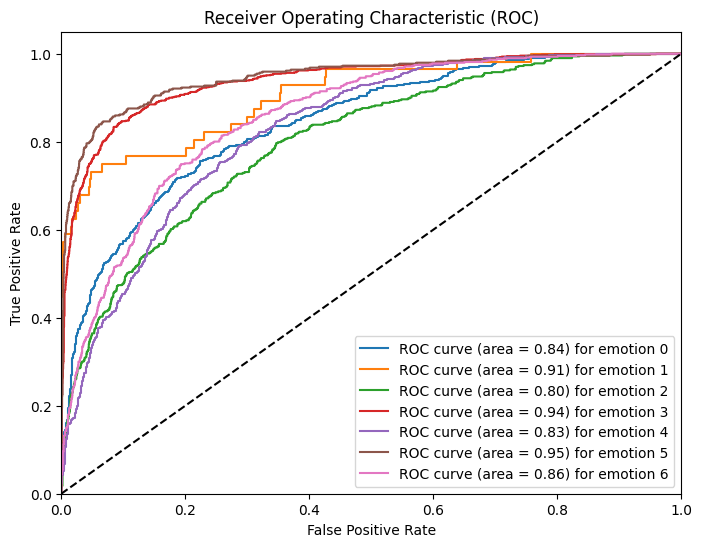

In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert integer labels to one-hot encoded format
lb = LabelBinarizer()
Y_test_binary = lb.fit_transform(y_test)
# Get predicted probabilities for each class
Y_pred_prob = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):  # assuming there are 7 classes
    fpr[i], tpr[i], _ = roc_curve(Y_test_binary[:, i], Y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(7):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for emotion %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()




In [21]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score
# Get predicted probabilities for each class
Y_pred_prob = model.predict(X_test)


threshold = 0.5
Y_pred_binary = (Y_pred_prob > threshold).astype(int)

# Convert integer labels to one-hot encoded format
Y_test_onehot = label_binarize(y_test, classes=np.arange(7))  # assuming 7 classes

# Calculate F1 score using the new binary predictions and one-hot encoded labels
f1 = f1_score(Y_test_onehot, Y_pred_binary, average='weighted')

print("F1 score:", f1)

113/113 [==============================] - 1s 8ms/step
F1 score: 0.6064202591571212


In [23]:
import numpy as np
from sklearn.metrics import precision_score
from sklearn.preprocessing import label_binarize

# Get predicted probabilities for each class
Y_pred_prob = model.predict(X_test)

# Choose a new threshold
new_threshold = 0.5

# Apply the new threshold to convert probabilities to binary predictions
Y_pred_binary = np.where(Y_pred_prob >= new_threshold, 1, 0)

# Convert integer labels to one-hot encoded format
Y_test_onehot = label_binarize(y_test, classes=np.arange(7))  # assuming 7 classes

# Calculate precision using the new binary predictions and one-hot encoded labels
precision = precision_score(Y_test_onehot, Y_pred_binary, average='weighted')

print("Precision with new threshold:", precision)

113/113 [==============================] - 1s 9ms/step
Precision with new threshold: 0.618599154513809


In [38]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Add this import for heatmap plotting

# Get predicted probabilities for each class
Y_pred_prob = model.predict(X_test)

# Convert probabilities to predicted labels
Y_pred = np.argmax(Y_pred_prob, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, Y_pred)
Emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=Emotions, yticklabels=Emotions)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


113/113 [==============================] - 1s 7ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets